In [1]:
import tensorflow as tf
import numpy as np
import os

# ==============================================================================
# Langkah 1: Tentukan Nama File Model Anda
# Ganti 'model_depresi.h5' dengan nama file .h5 Anda yang sebenarnya.
# ==============================================================================
MODEL_FILENAME = 'model\model_LR_0.001_BS_32.h5'

# ==============================================================================
# Langkah 2: Muat Model .h5 Anda
# ==============================================================================
try:
    if not os.path.exists(MODEL_FILENAME):
        raise FileNotFoundError(f"Error: File model '{MODEL_FILENAME}' tidak ditemukan. Pastikan file tersebut berada di folder yang sama dengan skrip ini.")
    
    model = tf.keras.models.load_model(MODEL_FILENAME)
    print(f"✅ Model '{MODEL_FILENAME}' berhasil dimuat!")
    model.summary()
except Exception as e:
    print(f"❌ Error saat memuat model: {e}")
    exit()

# ==============================================================================
# Langkah 3: Urutan Fitur (Sebagai Referensi)
# Urutan ini PENTING untuk memastikan setiap angka sesuai dengan fiturnya.
# ==============================================================================
feature_order = [
    'AGERNG', 'GENDER', 'EDU', 'PROF', 'MARSTS', 'RESDPL', 'LIVWTH', 
    'ENVSAT', 'POSSAT', 'FINSTR', 'DEBT', 'PHYEX', 'SMOKE', 'DRINK', 
    'ILLNESS', 'PREMED', 'EATDIS', 'AVGSLP', 'INSOM', 'TSSN', 
    'WRKPRE', 'ANXI', 'DEPRI', 'ABUSED', 'CHEAT', 'THREAT', 'SUICIDE', 
    'INFER', 'CONFLICT', 'LOST'
]
EXPECTED_FEATURE_COUNT = len(feature_order)

# ==============================================================================
# Langkah 4: Masukkan Data Numerik Anda di Sini
# ==============================================================================

# --- PANDUAN NILAI INPUT ---
# Gunakan panduan ini untuk memilih nilai yang benar untuk setiap fitur.
# 'AGERNG': 0:'16-20', 1:'21-25', 2:'26-30', 3:'31-35', 4:'36-40', 5:'41-45', 6:'46-50', 7:'51-55', 8:'56-60', 9:'61+'
# 'GENDER': 0:'Male', 1:'Female'
# 'EDU':    0:'SSC', 1:'HSC', 2:'Graduate', 3:'Post Graduate'
# 'PROF':   0:'Student', 1:'Service holder (Private)', 2:'Service holder (Government)', 3:'Businessman', 4:'Unemployed', 5:'Other'
# 'MARSTS': 0:'Unmarried', 1:'Married', 2:'Divorced'
# 'RESDPL': 0:'Village', 1:'Town', 2:'City'
# 'LIVWTH': 0:'Without Family', 1:'With Family'
# 'PHYEX':  0:'Never', 1:'Sometimes', 2:'Regularly'
# 'AVGSLP': 0:'Below 5 h', 1:'5 h', 2:'6 h', 3:'7 h', 4:'8 h', 5:'More than 8 h'
# 'TSSN':   0:'Less than 2 h', 1:'2-4 h a day', 2:'5-7 h a day', 3:'8-10 h a day', 4:'More than 10 h a day'
# 'WRKPRE': 0:'Severe', 1:'Moderate', 2:'Mild', 3:'No Pressure'
#
# Untuk fitur 'Yes'/'No' berikut, gunakan: 0:'No', 1:'Yes'
# 'ENVSAT', 'POSSAT', 'FINSTR', 'DEBT', 'SMOKE', 'DRINK', 'ILLNESS', 'PREMED', 
# 'EATDIS', 'INSOM', 'ANXI', 'DEPRI', 'ABUSED', 'CHEAT', 'THREAT', 
# 'SUICIDE', 'INFER', 'CONFLICT', 'LOST'
# --------------------------------

# Ganti nilai di sebelah kiri komentar (#) sesuai dengan data Anda.
# Pastikan ada 30 baris/angka di dalam list ini.
numerical_input_data = [
    2,  # AGERNG: Rentang Usia
    1,  # GENDER: Jenis Kelamin
    2,  # EDU: Pendidikan
    0,  # PROF: Profesi
    0,  # MARSTS: Status Pernikahan
    2,  # RESDPL: Tempat Tinggal
    1,  # LIVWTH: Tinggal Dengan
    1,  # ENVSAT: Kepuasan Lingkungan (0/1)
    1,  # POSSAT: Kepuasan Posisi (0/1)
    0,  # FINSTR: Kesulitan Keuangan (0/1)
    0,  # DEBT: Hutang (0/1)
    1,  # PHYEX: Olahraga Fisik
    0,  # SMOKE: Merokok (0/1)
    0,  # DRINK: Minum Alkohol (0/1)
    0,  # ILLNESS: Penyakit (0/1)
    0,  # PREMED: Pengobatan Sebelumnya (0/1)
    0,  # EATDIS: Gangguan Makan (0/1)
    3,  # AVGSLP: Rata-rata Tidur
    1,  # INSOM: Insomnia (0/1)
    1,  # TSSN: Waktu di Media Sosial
    1,  # WRKPRE: Tekanan Kerja
    1,  # ANXI: Kecemasan (0/1)
    0,  # DEPRI: Depresi (0/1)
    0,  # ABUSED: Pernah Dilecehkan (0/1)
    0,  # CHEAT: Pernah Dikhianati (0/1)
    0,  # THREAT: Pernah Diancam (0/1)
    0,  # SUICIDE: Bunuh Diri (0/1)
    0,  # INFER: Perasaan Inferior (0/1)
    1,  # CONFLICT: Konflik dengan Seseorang (0/1)
    0,  # LOST: Kehilangan Seseorang (0/1)
]

# ==============================================================================
# Langkah 5: Validasi dan Persiapan Input
# ==============================================================================
print("\n🔄 Memvalidasi input Anda...")

if len(numerical_input_data) != EXPECTED_FEATURE_COUNT:
    print(f"❌ Error: Input Anda memiliki {len(numerical_input_data)} fitur, tetapi model mengharapkan {EXPECTED_FEATURE_COUNT} fitur.")
    print("Mohon periksa kembali `numerical_input_data`.")
    exit()

input_array = np.array(numerical_input_data).reshape(1, -1)
print("✅ Input valid dan siap untuk prediksi.")

# ==============================================================================
# Langkah 6: Lakukan Prediksi
# ==============================================================================
print("🧠 Melakukan prediksi...")
prediction = model.predict(input_array)
prediction_probability = prediction[0][0]
predicted_class = 1 if prediction_probability > 0.5 else 0

# ==============================================================================
# Langkah 7: Tampilkan Hasil Prediksi
# ==============================================================================
result_text = "Depresi" if predicted_class == 1 else "Tidak Depresi"

print("\n" + "="*40)
print("          HASIL PREDIKSI AKHIR")
print("="*40)
print(f"Input Numerik Anda: \n{numerical_input_data}")
print(f"\nProbabilitas Depresi dari Model: {prediction_probability:.4f} ({prediction_probability*100:.2f}%)")
print(f"Kelas Prediksi (0=Tidak, 1=Ya): {predicted_class}")
print("-" * 40)
print(f"Kesimpulan: Berdasarkan input, kondisi diprediksi sebagai **{result_text}**.")
print("="*40)
print("\nCatatan: Hasil ini murni berdasarkan model dan tidak menggantikan diagnosis profesional.")


<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\bania\AppData\Local\Temp\ipykernel_14132\1763601055.py:9: SyntaxWarning: invalid escape sequence '\m'
  MODEL_FILENAME = 'model\model_LR_0.001_BS_32.h5'


✅ Model 'model\model_LR_0.001_BS_32.h5' berhasil dimuat!


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)              │ (None, 28, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 26, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 13, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 13, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1664)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │       106,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,587 (514.02 KB)

 Trainable params: 131,585 (514.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)


🔄 Memvalidasi input Anda...
✅ Input valid dan siap untuk prediksi.
🧠 Melakukan prediksi...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step

          HASIL PREDIKSI AKHIR
Input Numerik Anda: 
[2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]

Probabilitas Depresi dari Model: 0.9446 (94.46%)
Kelas Prediksi (0=Tidak, 1=Ya): 1
----------------------------------------
Kesimpulan: Berdasarkan input, kondisi diprediksi sebagai **Depresi**.

Catatan: Hasil ini murni berdasarkan model dan tidak menggantikan diagnosis profesional.


In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input, Model

# Load Data
train_df = pd.read_csv("dataset/train_data_70.csv")
val_df = pd.read_csv("dataset/val_data_15.csv")
test_df = pd.read_csv("dataset/test_data_15.csv")

X_train = train_df.drop("DEPRESSED", axis=1).values
y_train = train_df["DEPRESSED"].values
X_val = val_df.drop("DEPRESSED", axis=1).values
y_val = val_df["DEPRESSED"].values

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_train_scaled = X_train_scaled.reshape(-1, 30, 1)
X_val_scaled = X_val_scaled.reshape(-1, 30, 1)

# Class weight
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

inputs = Input(shape=(30, 1))  # ✅ wajib eksplisit
x = Conv1D(64, 3, activation='relu')(inputs)
x = MaxPooling1D(2)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = MaxPooling1D(2)(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("model_final_stable.h5", save_best_only=True)
]

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5945 - loss: 0.6754

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6553 - loss: 0.6377 - val_accuracy: 0.7802 - val_loss: 0.4508
Epoch 2/50
10/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8347 - loss: 0.3930 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8295 - loss: 0.3864 - val_accuracy: 0.8132 - val_loss: 0.3935
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8456 - loss: 0.3379

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8451 - loss: 0.3367 - val_accuracy: 0.8242 - val_loss: 0.3932
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8671 - loss: 0.2664 - val_accuracy: 0.8132 - val_loss: 0.4011
Epoch 5/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8970 - loss: 0.2192 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8853 - loss: 0.2360 - val_accuracy: 0.8571 - val_loss: 0.3702
Epoch 6/50
10/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9222 - loss: 0.2005 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9069 - loss: 0.2186 - val_accuracy: 0.8791 - val_loss: 0.3202
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8739 - loss: 0.2504 - val_accuracy: 0.8901 - val_loss: 0.3221
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9089 - loss: 0.2172 - val_accuracy: 0.8571 - val_loss: 0.3590
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9178 - loss: 0.2109 - val_accuracy: 0.8462 - val_loss: 0.3813
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9114 - loss: 0.2056 - val_accuracy: 0.9011 - val_loss: 0.3245
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9333 - loss: 0.1676 - val_accuracy: 0.8901 - val_loss: 0.3231


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8840 - loss: 0.2755

✅ Test Accuracy: 0.8462
📊 Jumlah data latih per kelas: [143 279]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step



📋 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.89      0.86      0.88        59

    accuracy                           0.85        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.85      0.85      0.85        91

🧾 Confusion Matrix:
[[26  6]
 [ 8 51]]
🎯 F1 Score (threshold=0.5): 0.8793
✅ Model dan scaler disimpan.


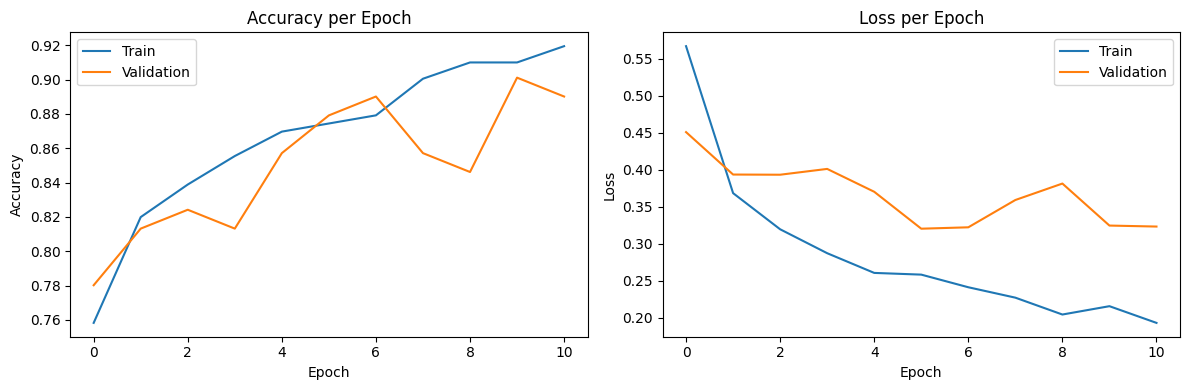

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import joblib

# --- Preprocess Test Data ---
X_test = test_df.drop("DEPRESSED", axis=1).values
y_test = test_df["DEPRESSED"].values

X_test_scaled = scaler.transform(X_test)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# --- Evaluasi Model di Test Set ---
loss, acc = model.evaluate(X_test_scaled, y_test)
print(f"\n✅ Test Accuracy: {acc:.4f}")
print(f"📊 Jumlah data latih per kelas: {np.bincount(y_train)}")

# --- Prediksi ---
y_pred_prob = model.predict(X_test_scaled).flatten()
threshold = 0.5  # Bisa diubah ke 0.55, 0.6, dll
y_pred_labels = (y_pred_prob > threshold).astype(int)

# --- Evaluasi Klasifikasi ---
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_labels))

print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_labels))

print(f"🎯 F1 Score (threshold={threshold}): {f1_score(y_test, y_pred_labels):.4f}")

# --- Simpan Model dan Scaler ---
model.save("model_fixed.h5")
joblib.dump(scaler, 'scaler.pkl')
print("✅ Model dan scaler disimpan.")

# --- Visualisasi Akurasi & Loss ---
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
